# 1- Set-up de la BDD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
movies = pd.read_csv("movie_metadata.csv", sep=',')

# 2- Inspection exploratoire

In [3]:
movies.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movies.tail(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [5]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
movies.shape

(5043, 28)

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [8]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [9]:
movies.count().sort_values()

gross                        4159
budget                       4551
aspect_ratio                 4714
content_rating               4740
plot_keywords                4890
title_year                   4935
director_name                4939
director_facebook_likes      4939
num_critic_for_reviews       4993
actor_3_facebook_likes       5020
actor_3_name                 5020
num_user_for_reviews         5022
color                        5024
duration                     5028
facenumber_in_poster         5030
actor_2_name                 5030
actor_2_facebook_likes       5030
language                     5031
actor_1_facebook_likes       5036
actor_1_name                 5036
country                      5038
imdb_score                   5043
cast_total_facebook_likes    5043
num_voted_users              5043
movie_title                  5043
genres                       5043
movie_imdb_link              5043
movie_facebook_likes         5043
dtype: int64

Text(0.5,1,'Proportion des colonnes avec des valeurs manquantes')

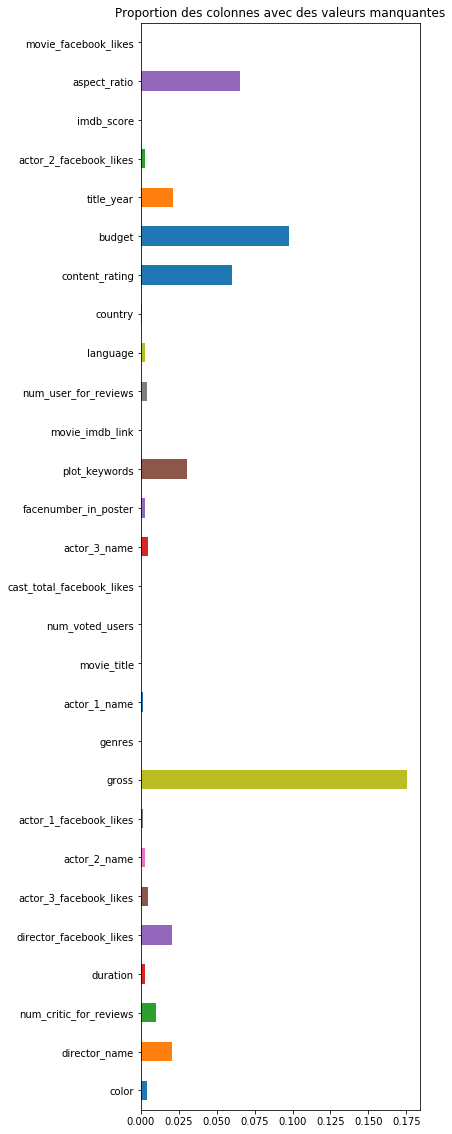

In [10]:
# Proportion des colonnes avec des valeurs manquantes

plt.figure(figsize=(5, 20))
movies.isnull().mean(axis=0).plot.barh()
plt.title("Proportion des colonnes avec des valeurs manquantes")

# Part 2 : Cleaning data

In [11]:
# Suppression des lignes avec des duplicates values 

movies.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [12]:
# Dupplicates sur la colonnes movie_title ?

duplicates = movies[movies.movie_title.map(movies.movie_title.value_counts() > 1)]
duplicates.sort_values('movie_title')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3711,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,617.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4894,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,618.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4950,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,...,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
4949,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,...,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
1420,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
4352,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
4408,Color,Yimou Zhang,101.0,95.0,611.0,3.0,Ni Yan,9.0,190666.0,Comedy|Drama,...,20.0,Mandarin,China,R,NaN,2009.0,4.0,5.7,2.35,784
3007,Color,Yimou Zhang,101.0,95.0,611.0,3.0,Ni Yan,9.0,190666.0,Comedy|Drama,...,20.0,Mandarin,China,R,NaN,2009.0,4.0,5.7,2.35,784
4842,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000
1113,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000


In [13]:
# Supression des duplicates titles de la même année

movies = movies.drop_duplicates(subset=['movie_title', 'title_year'])

In [14]:
# Mise en forme de la colonne color 

movies.color = movies.color.map({'Color': 1, ' Black and White':0})

In [15]:
movies.content_rating.value_counts()

R            2069
PG-13        1411
PG            686
Not Rated     115
G             112
Unrated        59
Approved       54
TV-14          30
TV-MA          18
TV-PG          13
X              12
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [16]:
# Mise en forme de la colonne content_rating

movies.content_rating = movies.content_rating.map({'R': 17, 'PG-13': 13, 'PG': 0, 'Not Rated': 'NaN',
                                                  'G': 0, 'Unrated': 'NaN', 'Approved': 0, 'TV-14': 14,
                                                  'TV-MA': 17, 'TV-PG': 0, 'X': 17, 'TV-G': 0, 'Passed': 0,
                                                  'NC-17':17, 'GP':0, 'M': 17, 'TV-Y': 17, 'TV-Y7':17})

In [17]:
movies.content_rating.value_counts()

17     2113
13     1411
0       890
NaN     174
14       30
Name: content_rating, dtype: int64

In [18]:
# Mise en forme de la colonne movie_title

for index, movie in movies.iterrows():
    movie['movie_title'] = movie['movie_title'].replace(u"\xa0", u"")

In [19]:

for index,movie in movies.iterrows():
    movies['movie_title'][index] = movies['movie_title'][index].replace(u"\xa0", u"")

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
movies['movie_title'][4]

'Star Wars: Episode VII - The Force Awakens            '

In [21]:
for index, movie in movies.iterrows():
    movie['movie_title_l'] = movie['movie_title'].casefold()

# Analyse exploratoire univariée des variables 

moy:
 9796.505684210526
med:
 3148.0


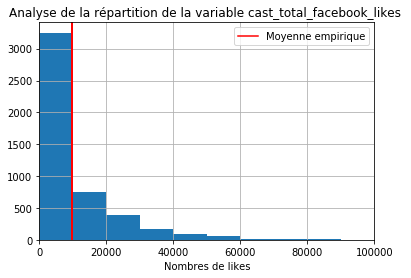

In [55]:
# cast_total_facebook_likes

print("moy:\n",movies['cast_total_facebook_likes'].mean())
print("med:\n",movies['cast_total_facebook_likes'].median())
movies['cast_total_facebook_likes'].hist(bins=10, range=(0,100000)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 100000)
plt.title("Analyse de la répartition de la variable cast_total_facebook_likes ")
plt.xlabel('Nombres de likes')
xbar = movies['cast_total_facebook_likes'].mean()
plt.axvline(xbar, color='r', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])


moy:
 707.668669527897
med:
 50.0


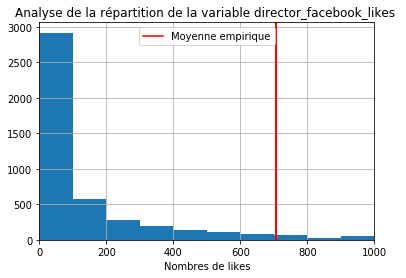

In [57]:
#director_facebook_likes

print("moy:\n",movies['director_facebook_likes'].mean())
print("med:\n",movies['director_facebook_likes'].median())
movies['director_facebook_likes'].hist(bins=10, range=(0,1000)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 1000)
plt.title("Analyse de la répartition de la variable director_facebook_likes ")
plt.xlabel('Nombres de likes')
xbar = movies['director_facebook_likes'].mean()
plt.axvline(xbar, color='r', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])



moy:
 7582.098736842106
med:
 175.5
max:
 349000


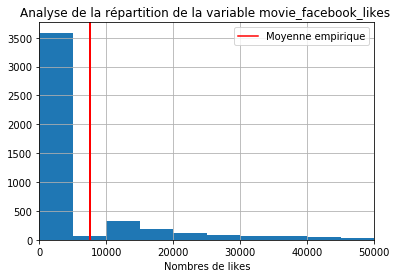

In [58]:
# movie_facebook_likes

print("moy:\n",movies['movie_facebook_likes'].mean())
print("med:\n",movies['movie_facebook_likes'].median())
print("max:\n",movies['movie_facebook_likes'].max())
movies['movie_facebook_likes'].hist(bins=10, range=(0,50000)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 50000)
plt.title("Analyse de la répartition de la variable movie_facebook_likes ")
plt.xlabel('Nombres de likes')
xbar = movies['movie_facebook_likes'].mean()
plt.axvline(xbar, color='r', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

moy:
 141.62624338624337
med:
 112.0
max:
 813.0


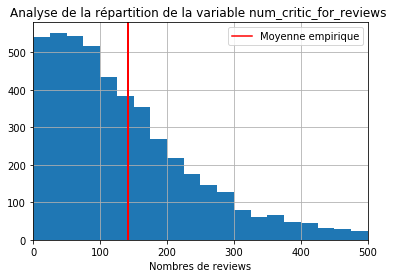

In [59]:
# num_critic_for_reviews

print("moy:\n",movies['num_critic_for_reviews'].mean())
print("med:\n",movies['num_critic_for_reviews'].median())
print("max:\n",movies['num_critic_for_reviews'].max())
movies['num_critic_for_reviews'].hist(bins=20, range=(0,500)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 500)
plt.title("Analyse de la répartition de la variable num_critic_for_reviews ")
plt.xlabel('Nombres de reviews')
xbar = movies['num_critic_for_reviews'].mean()
plt.axvline(xbar, color='r', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

moy:
 85470.08294736843
med:
 35833.5
max:
 1689764


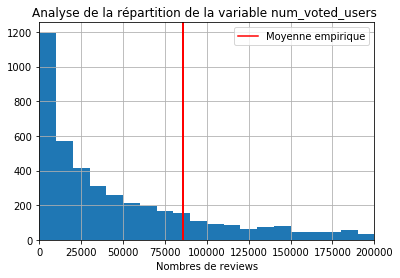

In [62]:
# num_voted_users

print("moy:\n",movies['num_voted_users'].mean())
print("med:\n",movies['num_voted_users'].median())
print("max:\n",movies['num_voted_users'].max())
movies['num_voted_users'].hist(bins=20, range=(0,200000)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 200000)
plt.title("Analyse de la répartition de la variable num_voted_users ")
plt.xlabel('Nombres de reviews')
xbar = movies['num_voted_users'].mean()
plt.axvline(xbar, color='r', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

moy:
 275.63048060708263
med:
 160.0
max:
 5060.0


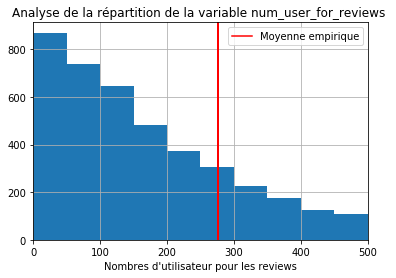

In [63]:
# num_user_for_reviews

print("moy:\n",movies['num_user_for_reviews'].mean())
print("med:\n",movies['num_user_for_reviews'].median())
print("max:\n",movies['num_user_for_reviews'].max())
movies['num_user_for_reviews'].hist(bins=10, range=(0,500)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 500)
plt.title("Analyse de la répartition de la variable num_user_for_reviews ")
plt.xlabel('Nombres d\'utilisateur pour les reviews')
xbar = movies['num_user_for_reviews'].mean()
plt.axvline(xbar, color='r', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])


moy:
 6.447894736842101
med:
 6.6
max:
 9.3


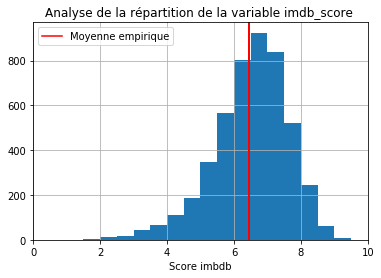

In [64]:
# imdb_score

print("moy:\n",movies['imdb_score'].mean())
print("med:\n",movies['imdb_score'].median())
print("max:\n",movies['imdb_score'].max())
movies['imdb_score'].hist(bins=20, range=(0,10)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 10)
plt.title("Analyse de la répartition de la variable imdb_score ")
plt.xlabel('Score imbdb')
xbar = movies['imdb_score'].mean()
plt.axvline(xbar, color='r', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

moy:
 107.58857022353438
med:
 104.0
max:
 511.0


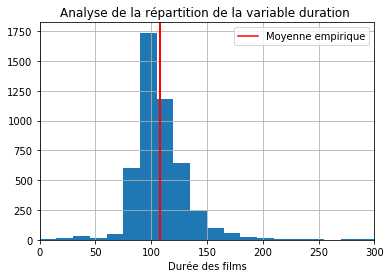

In [65]:
# duration

print("moy:\n",movies['duration'].mean())
print("med:\n",movies['duration'].median())
print("max:\n",movies['duration'].max())
movies['duration'].hist(bins=20, range=(0,300)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 300)
plt.title("Analyse de la répartition de la variable duration ")
plt.xlabel('Durée des films')
xbar = movies['duration'].mean()
plt.axvline(xbar, color='r', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

moy:
 40208052.8368531
med:
 20000000.0
max:
 12215500000.0


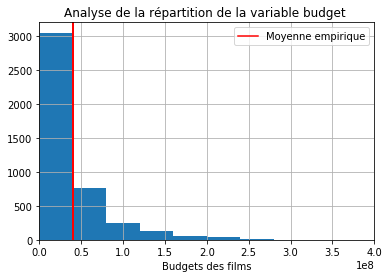

In [66]:
# budget

print("moy:\n",movies['budget'].mean())
print("med:\n",movies['budget'].median())
print("max:\n",movies['budget'].max())
movies['budget'].hist(bins=10, range=(0,400000000)) # Crée l'histogramme
plt.xlim(xmin=0, xmax = 400000000)
plt.title("Analyse de la répartition de la variable budget ")
plt.xlabel('Budgets des films')
xbar = movies['budget'].mean()
plt.axvline(xbar, color='r', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

moy:
 2002.1472103004292
med:
 2005.0
max:
 2016.0


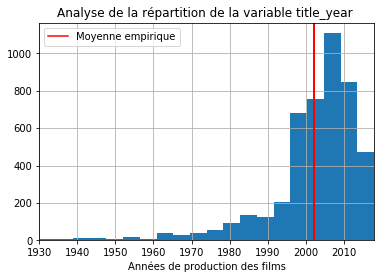

In [67]:
# title_year

print("moy:\n",movies['title_year'].mean())
print("med:\n",movies['title_year'].median())
print("max:\n",movies['title_year'].max())
movies['title_year'].hist(bins=20, range=(1930,2018)) # Crée l'histogramme
plt.xlim(xmin=1930, xmax = 2018)
plt.title("Analyse de la répartition de la variable title_year ")
plt.xlabel('Années de production des films')
xbar = movies['title_year'].mean()
plt.axvline(xbar, color='r', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

# Enregistrement de la nouvelle BDD

In [32]:
movies.to_csv("movies.csv",index=False)